# Sparse Hebbian Learning with Histogram Equalization Homeostasis : testing two different dictionary initalization strategies

1- Dictionary initialized as 2D White Noise

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
np.set_printoptions(precision=2, suppress=True)

In [3]:
from shl_scripts.shl_experiments import SHL

list_figures = ['show_dico']#, 'rec_error', 'plot_variance',  'plot_variance_histogram',  'time_plot_prob',  'time_plot_kurt',  'time_plot_var']
DEBUG_DOWNSCALE, verbose = 10, 0
DEBUG_DOWNSCALE, verbose = 10, 100
DEBUG_DOWNSCALE, verbose = 1, 10
N_scan = 7
tag = 'DICT_INIT'
opts = dict(DEBUG_DOWNSCALE=DEBUG_DOWNSCALE, homeo_method='HAP',
              learning_algorithm='mp', verbose=verbose)
shl = SHL(**opts)
data = shl.get_data(matname='data')

Extracting data..loading the data called : /tmp/data_cache/data_data
Data is of shape : (81920, 576) - done in 0.28s.


In [4]:
!rm -fr {shl.data_cache}/{tag}*lock*
!rm -fr {shl.data_cache}/{tag}*

## White Noise Initialization + Learning

No cache found /tmp/data_cache/DICT_INIT_WHITE_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... dooh!
Iteration   0 /   1024 (elapsed time:   0s,  0.0mn)
Iteration  103 /   1024 (elapsed time:   7s,  0.0mn)
Iteration  206 /   1024 (elapsed time:  13s,  0.0mn)
Iteration  309 /   1024 (elapsed time:  17s,  0.0mn)
Iteration  412 /   1024 (elapsed time:  21s,  0.0mn)
Iteration  515 /   1024 (elapsed time:  25s,  0.0mn)
Iteration  618 /   1024 (elapsed time:  29s,  0.0mn)
Iteration  721 /   1024 (elapsed time:  34s,  0.0mn)
Iteration  824 /   1024 (elapsed time:  38s,  0.0mn)
Iteration  927 /   1024 (elapsed time:  43s,  0.0mn)
Learning code... done (total time:  47s,  0.8mn)
done in 47.40s.


/usr/local/lib/python3.6/site-packages/matplotlib/figure.py:418: UserWarning: matplotlib is currently using a non-GUI backend, so cannot show the figure
  "matplotlib is currently using a non-GUI backend, "


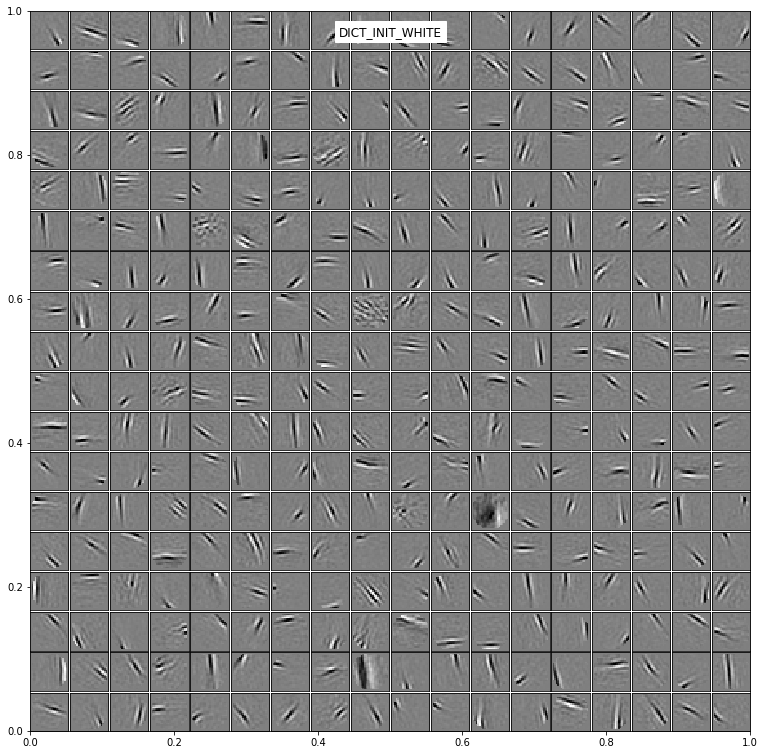

In [ ]:
matname = tag + '_WHITE'
shl = SHL(one_over_F=False, **opts)
dico_w = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

## 1/f Noise Initialization + Learning

In [ ]:
matname = tag + '_OVF'
shl = SHL(one_over_F=True, **opts)
dico_1oF = shl.learn_dico(data=data, matname=matname, list_figures=list_figures)

No cache found /tmp/data_cache/DICT_INIT_OVF_dico.pkl: Learning the dictionary with algo = mp 
 Training on 81920 patches... dooh!
Iteration   0 /   1024 (elapsed time:   1s,  0.0mn)
Iteration  103 /   1024 (elapsed time:   9s,  0.0mn)
Iteration  206 /   1024 (elapsed time:  16s,  0.0mn)
Iteration  309 /   1024 (elapsed time:  23s,  0.0mn)
Iteration  412 /   1024 (elapsed time:  28s,  0.0mn)
Iteration  515 /   1024 (elapsed time:  32s,  0.0mn)
Iteration  618 /   1024 (elapsed time:  37s,  0.0mn)
Iteration  721 /   1024 (elapsed time:  42s,  0.0mn)
Iteration  824 /   1024 (elapsed time:  46s,  0.0mn)
Iteration  927 /   1024 (elapsed time:  51s,  0.0mn)


In [ ]:
fig_error, ax_error = None, None
fig_error, ax_error = shl.time_plot(dico_w, variable='error', fig=fig_error, ax=ax_error, color='blue', label='white')
fig_error, ax_error = shl.time_plot(dico_1oF, variable='error', fig=fig_error, ax=ax_error, color='red', label='1/f')
ax_error.set_ylim((0, .65))
ax_error.legend(loc='best');